## Observations and Insights 

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_mice_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_mice_df = merge_mice_df.rename(columns={"Mouse ID": "Mouse_ID"})
merge_mice_df.head()

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice in the DataFrame.
mice_grouped = merge_mice_df.groupby(["Mouse_ID"])
mice_df = mice_grouped.count()
mice_count = len(mice_df)
mice_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = merge_mice_df[merge_mice_df.duplicated(subset=['Mouse_ID','Timepoint'], keep=False)]
duplicates_grouped = duplicates_df.groupby("Mouse_ID")
duplicate_count = duplicates_grouped.count()
duplicate_count = duplicate_count.index.tolist()

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = (merge_mice_df[~merge_mice_df.Mouse_ID.isin(duplicate_count)])

In [6]:
# Checking the number of mice in the clean DataFrame.
df_grouped = clean_df.groupby(["Mouse_ID"])
mice_df = df_grouped.count()
mice_count = len(mice_df)
mice_count

248

## Summary Statistics

In [7]:
# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_df = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]]
drugs_grouped = drug_df.groupby(["Drug Regimen"])
drug_list = drugs_grouped.mean()
drug_list = drug_list.rename(columns={"Tumor Volume (mm3)": "Tumor Mean (Avg.)"})
drug_list["Tumor Median"] = drugs_grouped.median()
drug_list["Tumor Variance"] = drugs_grouped.var()
drug_list["Std. Deviation"] = drugs_grouped.std()
drug_list["Std. Error of Mean"] = drugs_grouped.sem()
drug_list

,Tumor Mean (Avg.),Tumor Median,Tumor Variance,Std. Deviation,Std. Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(0, 0.5, 'Number of Mice')

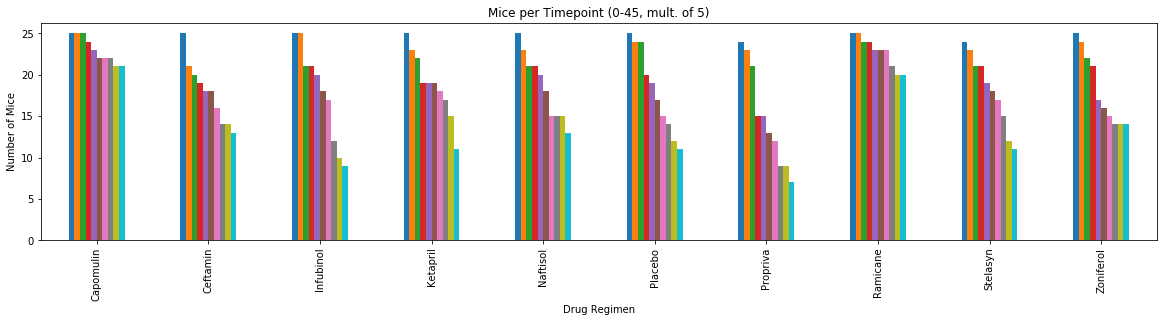

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment using pandas.
drug_and_time = clean_df[["Drug Regimen", "Mouse_ID", "Timepoint"]]
drug_time_grouped = drug_and_time.groupby(["Drug Regimen", "Timepoint"])
bar_df = drug_time_grouped.count()
mice_bar = bar_df.unstack().plot(kind="bar", legend= False, title="Mice per Timepoint (0-45, mult. of 5)", figsize=(20,4))
mice_bar.set_ylabel("Number of Mice")

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment using pyplot.

## Pie Plots

Text(0, 0.5, '')

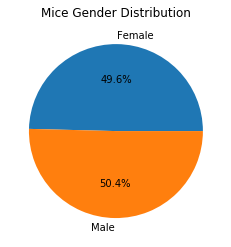

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_df.groupby(["Sex","Mouse_ID"])
gender_totals = gender_group.count()
gender_totals = gender_totals.reset_index(["Mouse_ID"])
gender_totals = gender_totals.reset_index(["Sex"])
pie_group = gender_totals.groupby(["Sex"])
pie_df = pie_group.count()
plot = pie_df.plot.pie(y="Mouse_ID", title="Mice Gender Distribution", legend=False, autopct="%1.1f%%")
plot.set_ylabel("")

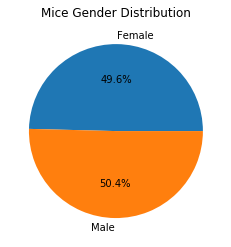

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Female", "Male"]
plt.pie(pie_df["Mouse_ID"], labels=sex,
        autopct="%1.1f%%", shadow=False)
plt.title("Mice Gender Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
top_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_time = 45
final_time_df = clean_df.loc[(
    clean_df["Timepoint"] == final_time)]

select_drugs_df = final_time_df.loc[final_time_df["Drug Regimen"].isin(top_drugs)]
select_drugs_df = select_drugs_df.reset_index(drop=True)

tumors = select_drugs_df["Tumor Volume (mm3)"]
quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The median tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 33.48002734
The upper quartile of tumor volume is: 62.14221369
The interquartile range of tumor volumes is: 28.66218635
The median tumor volume is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


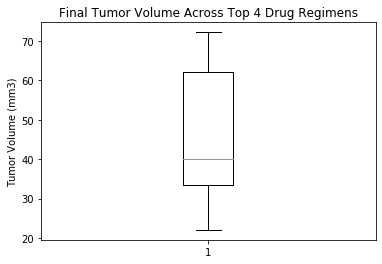

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Across Top 4 Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumors)
plt.show()

## Line and Scatter Plots

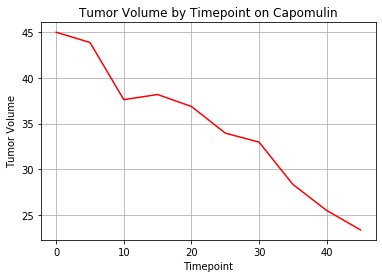

In [44]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_df = clean_df.loc[(
    clean_df["Drug Regimen"] == "Capomulin")]
one_df = cap_df.loc[(
    cap_df["Mouse_ID"] == "s185")]
timepoint = one_df['Timepoint']
tumor_vol = one_df['Tumor Volume (mm3)']
cap_time, = plt.plot(timepoint, tumor_vol, color="red", label="Danger Drop")
plt.title("Tumor Volume by Timepoint on Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.grid()

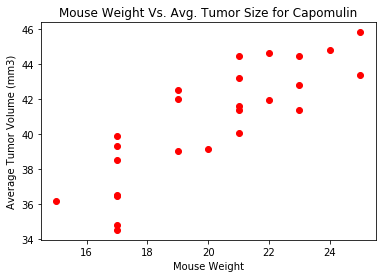

In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mice_grouped = cap_df.groupby(["Mouse_ID"])
average_df = mice_grouped.mean()
weight = average_df["Weight (g)"]
tumor = average_df["Tumor Volume (mm3)"]
plt.title("Mouse Weight Vs. Avg. Tumor Size for Capomulin")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(weight, tumor, marker="o", facecolors="red")
plt.show()

## Correlation and Regression

Correlation coefficient is 0.84.


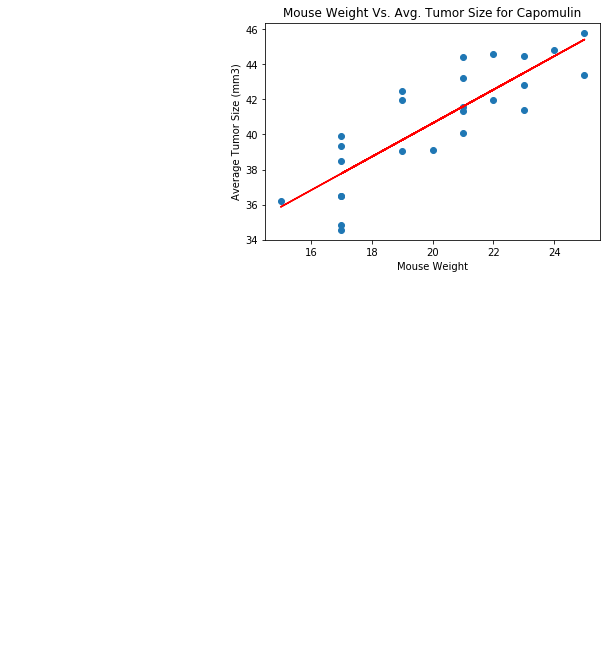

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight, tumor)
print(f"Correlation coefficient between weight and tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, tumor)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Mouse Weight Vs. Avg. Tumor Size for Capomulin")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Size (mm3)')
plt.show()